## Bootstrapping
When we want to calculate the reliability of some statistical estimation, when the standard error of some estimation is unknown, we can use the bootstrapping. We can calculate our parameter (e.g. mean or median) on our sample. Then we draw new samples from our sample with replacement and calculate our parameter again (e.g. median on every fake sample). Standard deviation of all our new parameters is estimation of the standard error. We than can calculate the reliability of our estimation.

In [16]:
import math
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
data = np.random.randn(300).flatten() # we create the fake data with 300 points normally distributed

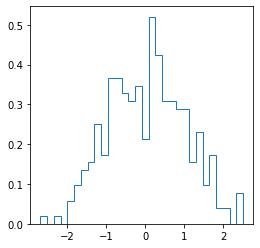

In [25]:
plt.figure(figsize=(4,4))
plt.hist(data, bins=30, density=True, histtype='step');

In [27]:
#sample parameter (mean)
np.mean(data)

0.05018203305975001

In [30]:
func = np.mean

In [31]:
func(data)

0.05018203305975001

In [ ]:
random.choices()

In [37]:
import random
import seaborn as sns


def bootstraping(func, data, n_of_samples):
    empiric_estimation = func(data)
    sampled_estimation = []
    for sample in range(n_of_samples):
        sampled_estimation.append(func(random.choices(data, k=len(data)-3))) # we calculate the desired parameter 
#         (through func) for each bottstrapped sample
    st_error = np.std(sampled_estimation)
    confidence_interval = (empiric_estimation-1.96*st_error, empiric_estimation+1.96*st_error)
    print(f'With the 95% of certainty we can infere that our population estimate lies bettween {confidence_interval[0]} and {confidence_interval[1]}')
    
    sns.distplot(sampled_estimation, hist=True, kde=True)
    
    return confidence_interval
    
    

With the 95% of certainty we can infere that our population estimate lies bettween -0.05537486939091606 and 0.15573893551041607


(-0.05537486939091606, 0.15573893551041607)

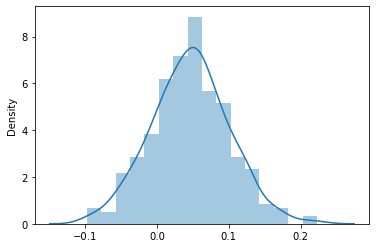

In [39]:
#now we calculate estimation for mean on our fake data 
import warnings
warnings.filterwarnings("ignore")
bootstraping(np.mean, data, 300)

In [ ]:
# Now we will see, according to the central limit theorem, that independently of our data distribution 
#(which will be uniformed in next eg.), our sampled estimation will be normally distributed.

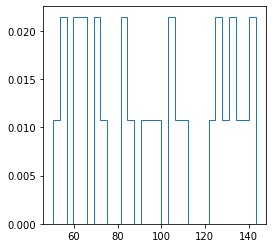

In [40]:
uniformed_data = np.random.uniform(50,150,30)
plt.figure(figsize=(4,4))
plt.hist(uniformed_data, bins=30, density=True, histtype='step');

With the 95% of certainty we can infere that our population estimate lies bettween 86.03886996227669 and 109.24102526133561


(86.03886996227669, 109.24102526133561)

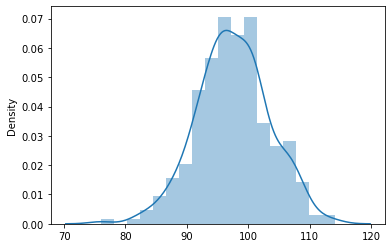

In [42]:
#now we calculate estimation for mean on our fake unuform data for simulation of central limit theorem 
import warnings
warnings.filterwarnings("ignore")
bootstraping(np.mean, uniformed_data, 300)